In [6]:
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from os import path
import cv2
import scipy.misc

In [7]:
dados = np.loadtxt('ocr_car_numbers_rotulado.txt')


In [93]:
def getImage(data, row):
    image = data[row, :-1] #seleciona a lilha e apaga o útima coluna
    image.shape = (35, 35) #converte para duas dimensões
    image[image==1]=255
    image = np.uint8(image)
    return image
    

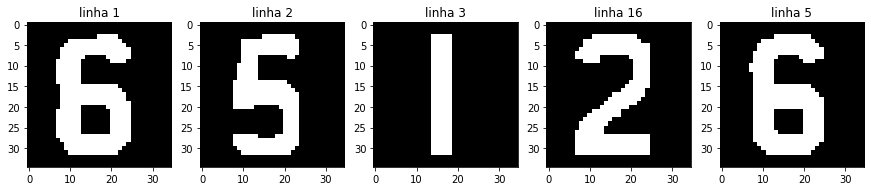

In [110]:
linhas = [1,2,3,16,5]

imgs = [getImage(dados, i) for i in linhas]

plt.figure(figsize=(15,10))
for i in range(len(linhas)):
    plt.subplot(1,len(linhas),i+1)
    plt.subplot(1,len(linhas),i+1).set_title('linha ' + str(linhas[i]))
    plt.imshow(imgs[i], 'gray')


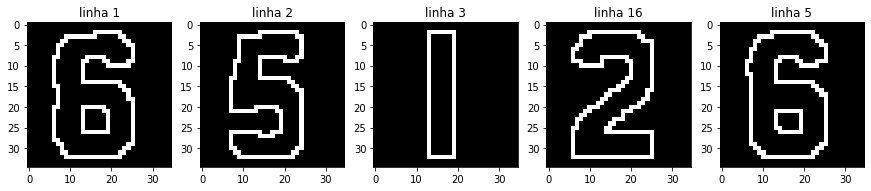

In [111]:
#canny = cv2.Canny(img,100,300)
#edges = canny.copy()

kernel = np.ones((3,3), np.uint8)
edges = [cv2.dilate(img, kernel, iterations=1) - img for img in imgs] #array de bordas do array de imagens

plt.figure(figsize=(15,10))
for i in range(len(linhas)):
    plt.subplot(1,len(linhas),i+1)
    plt.subplot(1,len(linhas),i+1).set_title('linha ' + str(linhas[i]))
    plt.imshow(edges[i], 'gray')

In [112]:
def verifyNeighborhood(image, point):
    print(point)
    if image[point[0]-1, point[1]] == 255:
        image[point[0]-1, point[1]] = 0
        print('0')
        return [point[0]-1, point[1]]
    
    elif image[point[0], point[1]+1] == 255:
        image[point[0], point[1]+1] = 0
        print('1')
        return [point[0], point[1]+1]
    
    elif image[point[0]+1, point[1]] == 255:
        image[point[0]+1, point[1]] = 0
        print('2')
        return [point[0]+1, point[1]]
    
    elif image[point[0], point[1]-1] == 255:
        image[point[0], point[1]-1] = 0
        print('3')
        return [point[0], point[1]-1]
    else:
        return ('none')
        

In [113]:
newIm = edges[3].copy()

max_xy = np.where(newIm == 255)

print(max_xy[0][0], max_xy[1][0])

newImgRGB = np.zeros([35,35,3])
newImgRGB[:,:,0] = newImgRGB[:,:,1] = newImgRGB[:,:,2] = imgs[3]

#cv2.circle(newImgRGB, [max_xy[1][0], max_xy[0][0]], int(1), (0, 0, 255), 2)

startPoint = [max_xy[0][0], max_xy[1][0]]

point = verifyNeighborhood(newIm, startPoint)
points = []
points.append([point[1], point[0]])

while(point != startPoint):
    #cv2.circle(newImgRGB, (point[1],point[0]), int(1), (0, 0, 255), 1)
    #cv2.imshow('image', newImgRGB)
    #cv2.waitKey(0)
        
    cv2.circle(newImgRGB, (point[1],point[0]), int(1), (0, 0, 255), 1)
    point = verifyNeighborhood(newIm, point)
    points.append([point[1], point[0]])
    

           
    

2 10
[2, 10]
1
[2, 11]
1
[2, 12]
1
[2, 13]
1
[2, 14]
1
[2, 15]
1
[2, 16]
1
[2, 17]
1
[2, 18]
1
[2, 19]
1
[2, 20]
1
[2, 21]
1
[2, 22]
2
[3, 22]
1
[3, 23]
2
[4, 23]
1
[4, 24]
1
[4, 25]
2
[5, 25]
2
[6, 25]
2
[7, 25]
2
[8, 25]
2
[9, 25]
2
[10, 25]
2
[11, 25]
2
[12, 25]
2
[13, 25]
2
[14, 25]
2
[15, 25]
2
[16, 25]
3
[16, 24]
2
[17, 24]
2
[18, 24]
3
[18, 23]
2
[19, 23]
3
[19, 22]
2
[20, 22]
3
[20, 21]
3
[20, 20]
2
[21, 20]
3
[21, 19]
3
[21, 18]
2
[22, 18]
2
[23, 18]
3
[23, 17]
3
[23, 16]
2
[24, 16]
3
[24, 15]
2
[25, 15]
2
[26, 15]
1
[26, 16]
1
[26, 17]
1
[26, 18]
1
[26, 19]
1
[26, 20]
1
[26, 21]
1
[26, 22]
1
[26, 23]
1
[26, 24]
1
[26, 25]
2
[27, 25]
2
[28, 25]
2
[29, 25]
2
[30, 25]
2
[31, 25]
2
[32, 25]
3
[32, 24]
3
[32, 23]
3
[32, 22]
3
[32, 21]
3
[32, 20]
3
[32, 19]
3
[32, 18]
3
[32, 17]
3
[32, 16]
3
[32, 15]
3
[32, 14]
3
[32, 13]
3
[32, 12]
3
[32, 11]
3
[32, 10]
3
[32, 9]
3
[32, 8]
3
[32, 7]
3
[32, 6]
0
[31, 6]
0
[30, 6]
0
[29, 6]
0
[28, 6]
0
[27, 6]
0
[26, 6]
0
[25, 6]
1
[25, 7]
0
[24, 7]

In [114]:
contours = []
contours.append(np.array(points, np.int32))
#n_contours.append(contours)

imgs[3] = cv2.polylines(imgs[3][:],contours,True,(112,255,255),1)

In [115]:
def getChainCode(x1, y1, x2, y2): 
    dx = x2 - x1 
    dy = y2 - y1 
    
    if dx>0: #Significa que as posições podem ser (5,4,3)
        if dy <0 :
            code = 5
        elif dy==0:
            code = 4
        else:
            code = 3

    elif dx==0: # Significa que as posicoes podem ser (6,2)
        if dy<0:
            code = 6
        elif dy>0:
            code = 2
        else:
            code=8
    else: #Significa que as posicoes podem ser (7,0,1)
        if dy<0:
            code = 7
        elif dy==0:
            code = 0
        else:
            code = 1

    return code 

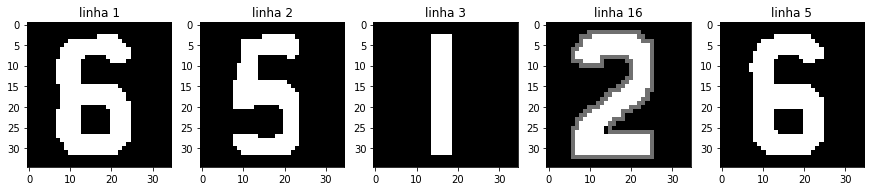

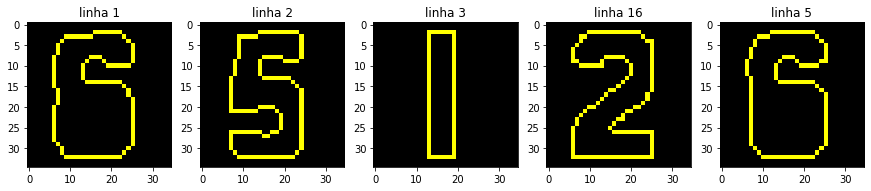

In [116]:
newImgs = []
n_contours = []

for i in range(len(edges)):
    contours, hierarchy = cv2.findContours(edges[i],cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    n_contours.append(contours)

    maior = 0 #descobrir qual conjunto de contornos tem mais pontos
    for sizet in range(len(contours)):
        if (len(contours[sizet])>maior):
            maior = sizet

    newImg = np.zeros([35,35,3])
    newImg = np.uint8(newImg)

    for ind_contour in range(len(contours)):

        #imgs[i] = cv2.polylines(imgs[i][:],contours,True,(112,255,255),1)#desenhando o poligono de acordo com os pontos
        newImg = cv2.polylines(newImg,contours,True,(0,255,255),1)#desenhando o poligono de acordo com os pontos
        
    newImgs.append(newImg)
    
plt.figure(figsize=(15,10))
for i in range(len(linhas)):
    plt.subplot(1,len(linhas),i+1)
    plt.subplot(1,len(linhas),i+1).set_title('linha ' + str(linhas[i]))
    plt.imshow(imgs[i], 'gray')
    
plt.figure(figsize=(15,10))
for i in range(len(linhas)):
    newImgs[i] = cv2.cvtColor(newImgs[i], cv2.COLOR_BGR2RGB)
    plt.subplot(1,len(linhas),i+1)
    plt.subplot(1,len(linhas),i+1).set_title('linha ' + str(linhas[i]))
    plt.imshow(newImgs[i], 'gray')

In [83]:
def generateChainCode(ListOfPoints): 
    chainCode = [] 
    textChain = " "
    for i in range(len(ListOfPoints)):
        a = ListOfPoints[i][0]
        #print("valor de A = ",a[0],a[1]) 
        if i != len(ListOfPoints)-1:
            b = ListOfPoints[i + 1][0]
            #print("valor de B = ",b[0],b[1])
        else :
            b = ListOfPoints[0][0] 
        chainCode.append(getChainCode(a[0], a[1], b[0], b[1]))
        textChain = textChain + str(getChainCode(a[0], a[1], b[0], b[1]))
        textChainT = str(getChainCode(a[0], a[1], b[0], b[1]))
        #DESCOMENTAR A LINHA ABAIXO PARA MOSTRAR O CODIGO DE CADA PONTO
        #cv2.putText(edges,textChainT, (a[0],a[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.3,(255,255,255),1,cv2.LINE_AA)
    return chainCode,textChain 

chain code  0  =   212124543210234567670765460
sum  0  =  95
Quantidade de pontos = 27
chain code  0  =   12121212121245431246546076560
sum  0  =  86
Quantidade de pontos = 29
chain code  0  =   12121212121212432465460760
sum  0  =  68
Quantidade de pontos = 26
chain code  0  =   10101232343210760123456767070
sum  0  =  84
Quantidade de pontos = 29
chain code  0  =   12124543212101212460754654565656070
sum  0  =  115
Quantidade de pontos = 35


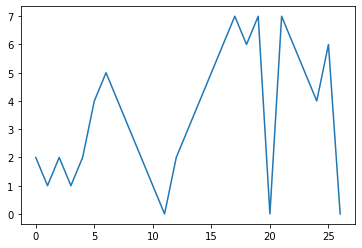

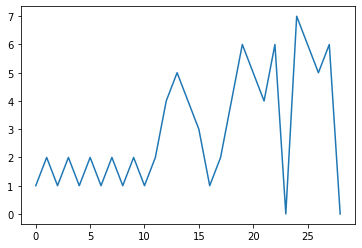

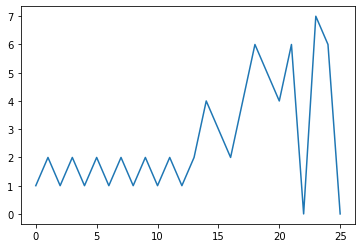

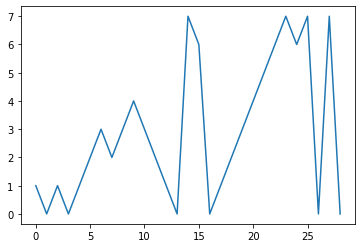

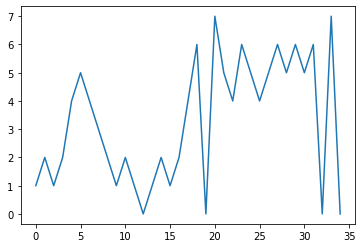

In [90]:
chainCodes = []

for contours in n_contours:
    chainCode,tsx = generateChainCode(contours[0])
    chainCodes.append(chainCode)
    print("chain code ",ind_contour," = ", tsx)
    print("sum ",ind_contour," = ",sum(chainCode))
    print("Quantidade de pontos =",len(contours[ind_contour]))
    
for chainCode in chainCodes:
    plt.plot(chainCode)
    plt.show()
    

    
